<h1>CS:GO Data Mining a Nested Json dataset.</h1>
<a href="https://www.linkedin.com/in/abhishek-venkatachalam-62121049/">Abhishek Venkatachalam</a>


<h2>Objective:</h2>
Pick any ONE JSON file from the data set and expand ALL columns (some columns need expanding multiple times).  Select TWO types of data and try to understand what the data is telling you about the match (for example, what does comparing "Alive Players Health" and "Round Status Time Left" tell you about the match?). Turn these two bits of data into a visualisation to clearly and accurately explain the data.


<h3>Steps to achieve the objective:</h3>

<b>0) Getting everything ready:</b> Importing the necessary headers and setting things up.  
<b>1) Data Selection:</b>Select and Import the JSON.  
<b>2) Data Cleaning and Preprocessing:</b> Expand Nested Json and remove the unnecessary maps and select just 1 map.  
<b>3) Data Transformation:</b> Remove unnecessary columns, expand the nested json. Convert categorical data into discrete numerical ones.  
<b>4) Data Analysis:</b> Perform the analysis and plot the graphs.  
<b>5) Conclusions:</b> Present the findings and knowledge discovered.   

  

<h3>0) Getting everything ready:</h3>  




In [846]:
#Importing all the necessary headers
import pandas as pd
from pandas.io.json import json_normalize

import requests

import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter
from scipy.stats import chi2_contingency
import pylab as pl

import numpy as np
import numpy.random
import seaborn as sns
import matplotlib.pyplot as plt

import scipy
from scipy import stats
from statsmodels.stats.weightstats import DescrStatsW
from sklearn.preprocessing import LabelEncoder

<h3>1) Data Selection:</h3>

In [847]:
#Loading the json into the dataframe, please change the file path appropriately.
df_initialdataset = pd.read_json('D:/University_of_Leicester/MS_DABI/Data_Analytics_for_egaming/Self_learning_days/CS_GO_2019-2020/CSGO_2019-2020_tournament_data/dataset_initial/dataset_16.json')

#Viewing a snippet of the dataset. Observe the "alive_players" column.
df_initialdataset.head(2)

,map,patch_version,map_crc,current_score,round_status,round_status_time_left,alive_players,active_smokes,active_molotovs,previous_kills,round_winner,planted_bomb
0,de_nuke,13718,43072076,"[0, 0]",Normal,114.77344,"[{'health': 100, 'armor': 0, 'has_helmet': Fal...",[],[],[],CT,None
1,de_nuke,13718,43072076,"[0, 0]",Normal,94.77344,"[{'health': 100, 'armor': 0, 'has_helmet': Fal...",[],[],[],CT,None


    
<h3>2) Data Cleaning and Preprocessing</h3>     


<h4>Removing the unnecessary maps</h4>

In [848]:
#Removing the unnecessary maps and storing the features of the map "de_mirage" into a new dataframe "df_preDataset"
df_preDataset = df_initialdataset.loc[df_initialdataset['map'] == 'de_mirage'].reset_index()

#Displaying a snippet of the "df_dataset" with just the map data of "de_mirage"
df_preDataset.head(2)

,index,map,patch_version,map_crc,current_score,round_status,round_status_time_left,alive_players,active_smokes,active_molotovs,previous_kills,round_winner,planted_bomb
0,193,de_mirage,13718,440099467,"[0, 0]",Normal,114.75781,"[{'health': 100, 'armor': 0, 'has_helmet': Fal...",[],[],[],Terrorist,None
1,194,de_mirage,13718,440099467,"[0, 0]",Normal,94.75781,"[{'health': 100, 'armor': 0, 'has_helmet': Fal...",[],[],[],Terrorist,None


     
<h3>3) Data Transformation</h3>    



<h4>Dropping the unnecessary columns</h4>

In [849]:
#Dropping the columns - 'active_smokes', 'active_molotovs', 'previous_kills', 'planted_bomb' from the "df_dataset" to declutter the dataset.
df_dataset = df_preDataset.drop(['active_smokes', 'active_molotovs', 'planted_bomb'], axis = 1)

#Displaying a snippet of the "df_dataset" after decluttering
df_dataset.head(2)



,index,map,patch_version,map_crc,current_score,round_status,round_status_time_left,alive_players,previous_kills,round_winner
0,193,de_mirage,13718,440099467,"[0, 0]",Normal,114.75781,"[{'health': 100, 'armor': 0, 'has_helmet': Fal...",[],Terrorist
1,194,de_mirage,13718,440099467,"[0, 0]",Normal,94.75781,"[{'health': 100, 'armor': 0, 'has_helmet': Fal...",[],Terrorist


<h4>Expanding the nested json of "active players" and "position history" into distinct columns</h4>

In [850]:
#Let's expand the nested json within "alive_players" into different columns.
#CAUTION - DO NOT use the below method if your column has blank values in between the rows where no nesten json query exists.

#Storing the nested json from the column "alive_players" as a Series in "data_aliveplayers"
columnName = 'alive_players'
data_aliveplayers = df_dataset[columnName]
list_aliveplayers = list()


#Iterating through the "list_aliveplayers" and seggregating the json snippets into individual lists
#Appending the nested jsons as individual lists to be later turned into columns in a DataFrame.
for nestedJson in data_aliveplayers:
    list_aliveplayers.append(nestedJson[0])

#Converting the list into a dataframe "df_aliveplayers".
df_aliveplayers = pd.DataFrame(list_aliveplayers)

#Soring the nested json from the column "position_history" into distinct columns.
data_positionHistory = df_aliveplayers['position_history']
list_positionHistory = list()

#Iterating through the "list_positionHistory" and seggregating the json snippets into individual lists
#Appending the nested jsons as individual lists to be later turned into columns in a DataFrame.
for nestedJson in data_positionHistory:
    list_positionHistory.append(nestedJson[0])

#Converting the list into a dataframe "df_positionHistory".
df_positionHistory = pd.DataFrame(list_positionHistory)

#Merging the tables "df_aliveplayers" and "df_positionHistory" into "df_aliveplayers".
df_aliveplayers = pd.concat([df_aliveplayers, df_positionHistory], axis=1)

#Dropping the additional "position_history" table.
df_aliveplayers = df_aliveplayers.drop(['position_history'], axis=1)

#Storing the nested json from the column "inventory" as a Series in "data_inventory"
data_inventory = df_aliveplayers['inventory']
list_inventory = list()


#Iterating through the "inventory" and seggregating the json snippets into individual lists
#Appending the nested jsons as individual lists to be later turned into columns in a DataFrame.
for nestedJson in data_inventory:
    list_inventory.append(nestedJson[0])

#Converting the list into a dataframe "df_inventory".
df_inventory = pd.DataFrame(list_inventory)
                               
#Merging the tables "df_aliveplayers" and "df_positionHistory" into "df_aliveplayers".
df_aliveplayers = pd.concat([df_aliveplayers, df_inventory], axis=1)                              

#Dropping the column 'inventory' from 'df_aliveplayers'.
df_aliveplayers = df_aliveplayers.drop(['inventory'], axis=1)

#Intermediate-step: Displaying a snippet of the Dataframe after converting the nested jsons into columns of the dataframe "df_aliveplayers".
df_aliveplayers.head(5)


,health,armor,has_helmet,has_defuser,money,team,x,y,z,item_type,clip_ammo,reserve_ammo
0,100,0,False,False,0,Terrorist,1366.9708,-232.77223,-167.96875,Glock,20,120
1,100,0,False,False,0,Terrorist,1366.9708,-232.77223,-167.96875,Glock,20,120
2,100,0,False,False,0,Terrorist,1366.9708,-232.77223,-167.96875,Glock,20,120
3,23,63,False,False,450,CT,-1720.4951,-1921.08830,-270.06820,UspS,12,11
4,100,0,False,False,3250,Terrorist,1136.0000,32.00000,-167.96875,Glock,20,120


<h4>Merging the expanded "nested json" columsn with the actual table "df_dataset"

In [851]:
#Dropping the "alive_players" column
df_xdataset = df_dataset.drop(['alive_players'], axis=1)

#Changing the settings to display all the columns.
pd.set_option('display.max_columns', None)

#Merging (and displaying a snippet of) the 2 tables - "df_xdataset" and "df_aliveplayers"
df_finaltable = pd.concat([df_xdataset, df_aliveplayers], axis = 1).reindex(df_dataset.index)
df_finaltable.head(5)


,index,map,patch_version,map_crc,current_score,round_status,round_status_time_left,previous_kills,round_winner,health,armor,has_helmet,has_defuser,money,team,x,y,z,item_type,clip_ammo,reserve_ammo
0,193,de_mirage,13718,440099467,"[0, 0]",Normal,114.757810,[],Terrorist,100,0,False,False,0,Terrorist,1366.9708,-232.77223,-167.96875,Glock,20,120
1,194,de_mirage,13718,440099467,"[0, 0]",Normal,94.757810,[],Terrorist,100,0,False,False,0,Terrorist,1366.9708,-232.77223,-167.96875,Glock,20,120
2,195,de_mirage,13718,440099467,"[0, 0]",Normal,74.757810,"[{'weapon': 'P250', 'attacker_position': {'x':...",Terrorist,100,0,False,False,0,Terrorist,1366.9708,-232.77223,-167.96875,Glock,20,120
3,196,de_mirage,13718,440099467,"[0, 0]",BombPlanted,37.570312,"[{'weapon': 'P250', 'attacker_position': {'x':...",Terrorist,23,63,False,False,450,CT,-1720.4951,-1921.08830,-270.06820,UspS,12,11
4,197,de_mirage,13718,440099467,"[0, 1]",FreezeTime,19.945312,[],Terrorist,100,0,False,False,3250,Terrorist,1136.0000,32.00000,-167.96875,Glock,20,120


<h3>4) Data Analysis</h3>

<h4>Describing the statstically significant aspects of the table.</h4>

In [852]:
df_finaltable.describe()
#Since the count of all of these columns is 195, we don't have to fill in any gaps.

,index,patch_version,map_crc,round_status_time_left,health,armor,money,x,y,z,clip_ammo,reserve_ammo
count,1263.000000,1263.000000,1.263000e+03,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000
mean,1668.608868,13719.826603,4.773310e+08,56.228109,92.916865,73.374505,2757.205067,-241.777975,-1019.396203,-219.121472,20.069675,67.346002
std,1016.213947,9.146242,7.491776e+07,36.933325,19.892147,41.230171,3006.598585,1519.384753,871.989012,52.418383,8.849860,34.986411
min,193.000000,13703.000000,4.400995e+08,0.007812,1.000000,0.000000,0.000000,-1976.000000,-2072.000000,-287.812230,0.000000,0.000000
25%,649.500000,13718.000000,4.400995e+08,19.980469,100.000000,67.000000,350.000000,-1720.000000,-1896.000000,-268.432340,12.000000,30.000000
50%,1838.000000,13718.000000,4.400995e+08,54.945312,100.000000,99.000000,2000.000000,-1552.000000,-1732.000000,-263.968750,20.000000,90.000000
75%,2554.500000,13723.000000,4.400995e+08,94.945310,100.000000,100.000000,3925.000000,1296.000000,-160.000000,-167.968750,30.000000,90.000000
max,3213.000000,13740.000000,6.499070e+08,114.968750,100.000000,100.000000,16000.000000,1376.000000,32.000000,-163.965100,35.000000,120.000000


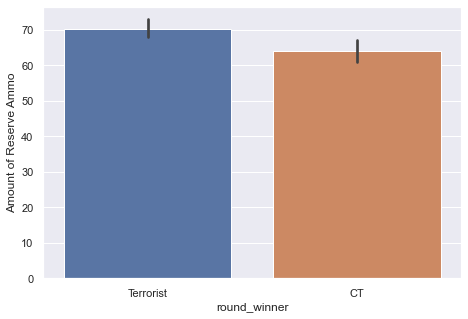

In [853]:
## This line sets the figure size
plt.rcParams['figure.figsize']=(7.5,5)

## This line plots the data. Here we are using the barplot() of seaborn.
## Normal arguments are x = column to be used for x-axis, same for y, and data = dataframe to be used
ax = sns.barplot(x = 'round_winner', y = 'reserve_ammo',data = df_finaltable)

## Setting the y-label
plt.ylabel("Amount of Reserve Ammo")

plt.show()

<AxesSubplot:xlabel='round_winner', ylabel='count'>

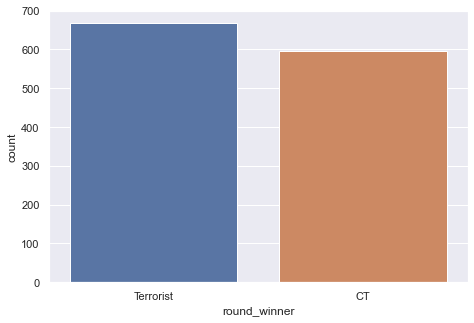

In [854]:
sns.set_theme(style="darkgrid")
sns.countplot(x='round_winner', data=df_finaltable)
#df_finaltable.head()

In [855]:
#After hours of trying, I finally "give up". I am exporting the "previos_kills" column to a json file.
#I will open it up in excel and expand the internal rows.
#Load the expanded rows back into python and merge it with the df_finaltable.
#I will also attach the converted file to the git hub for anyone willing, to try it.
#If any of you find a better approach to flatted these super complicated nested jsons, you will have my blessings.
#----------------------------------------

#The total number of rows after expanding is 2004, there is a disparity, but we are just going to roll with it since its from the same dataset for the same map.
#Lets go.

df_previousKills = pd.read_csv('D:/University_of_Leicester/MS_DABI/MA3002_Data_Mining_and_Neural_Networks/Learn_Python/PreviousKills.csv')
df_previousKills.head()

,map,weapon,attacker_position.x,attacker_position.y,attacker_position.z,attacker_side,victim_position.x,victim_position.y,victim_position.z,victim_side
0,de_mirage,P250,282.70557,-1485.63200,-175.96875,Terrorist,-971.55164,-2457.23780,-167.96875,CT
1,de_mirage,Glock,124.05679,-369.63820,-171.52907,Terrorist,-628.33280,-364.50177,-162.21596,CT
2,de_mirage,Glock,121.73570,-419.61115,-171.95801,Terrorist,-893.41630,-304.97810,-167.96875,CT
3,de_mirage,UspS,-552.84580,-1182.23470,-167.96875,CT,-826.30180,-439.31000,-167.14383,Terrorist
4,de_mirage,P250,282.70557,-1485.63200,-175.96875,Terrorist,-971.55164,-2457.23780,-167.96875,CT


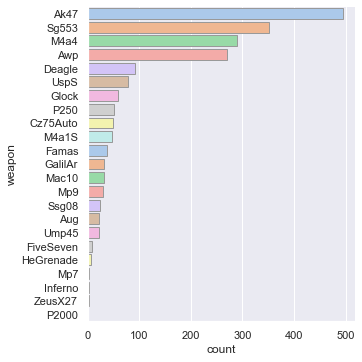

In [856]:
sns.catplot(y="weapon", kind="count", palette="pastel", edgecolor=".6", data=df_previousKills, order=df_previousKills.weapon.value_counts().sort_values(ascending=False).index)

In [857]:
contigency= pd.crosstab(df_previousKills['attacker_side'], df_previousKills['weapon']) 
contigency

weapon,Ak47,Aug,Awp,Cz75Auto,Deagle,Famas,FiveSeven,GalilAr,Glock,HeGrenade,Inferno,M4a1S,M4a4,Mac10,Mp7,Mp9,P2000,P250,Sg553,Ssg08,Ump45,UspS,ZeusX27
attacker_side,,,,,,,,,,,,,,,,,,,,,,,
CT,84,22,162,32,56,37,8,3,0,4,1,45,271,3,3,27,1,25,87,24,12,79,2
Terrorist,410,0,109,18,36,0,0,29,59,2,1,2,19,28,0,2,0,26,264,0,10,0,0


<h4>The Terrorists appear to have a lot more of AK47 and sg553. Perhaps this has something to do with them winning more often.</h4>

<AxesSubplot:xlabel='attacker_side', ylabel='weapon'>

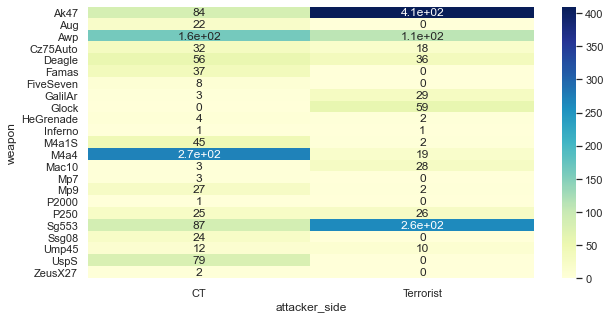

In [866]:
#Plot a heat map of the attacker_side vs weapon.
plt.figure(figsize=(10,5)) 

#pd.crosstab is used to build a cross tabulation of data points that show the fequency with which these groups of data appea.
contigency = pd.crosstab(df_previousKills['weapon'], df_previousKills['attacker_side'])
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

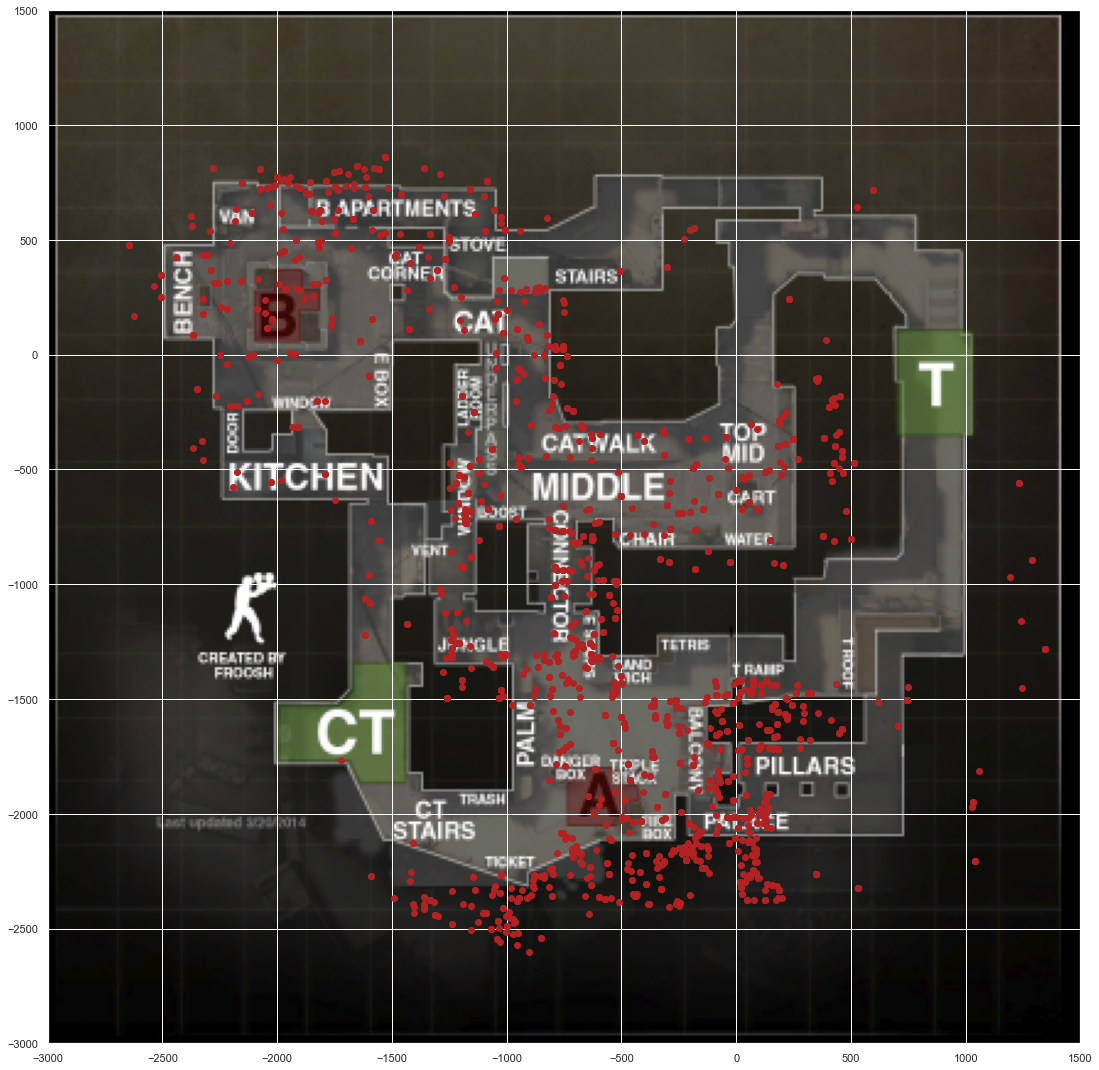

In [932]:
#pyplotz = plt.scatter(df_previousKills['victim_position.x'], df_previousKills['victim_position.y'])

fig, ax = plt.subplots(figsize = (20,19))
im = plt.imread('D:/University_of_Leicester/MS_DABI/MA3002_Data_Mining_and_Neural_Networks/Learn_Python/CSGOmirage.png')
implot = ax.imshow(im, extent=[-3000, 1500, -3000, 1500])

# # put a blue dot at (10, 20)
# plt.scatter([10], [20])

ax.plot(df_previousKills['victim_position.x'], df_previousKills['victim_position.y'], 'o', linewidth=1, color='firebrick')
                
# put a red dot, size 40, at 2 locations:
#plt.scatter(x=[30, 40], y=[50, 60], c='r', s=40)

#ax.show()



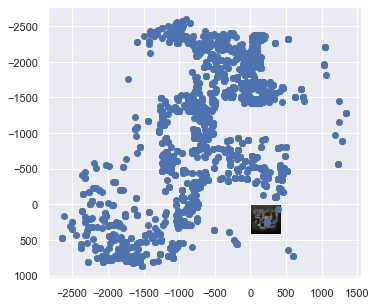

In [884]:
im = plt.imread('D:/University_of_Leicester/MS_DABI/MA3002_Data_Mining_and_Neural_Networks/Learn_Python/CSGOmirage.png')
implot = plt.imshow(im)
plt.plot(df_previousKills['victim_position.x'], df_previousKills['victim_position.y'],'o')
plt.show()

In [868]:
# a\pearson_coef, p_value = stats.pearsonr(df_finaltable[""], df_finaltable['reserve_ammo'])
# print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

TypeError: 'method' object is not subscriptable

In [860]:
# df_finaltable, map_code = encode_cat_var(df_finaltable, 'map')
# print(map_code)

# df_finaltable, round_status = encode_cat_var(df_finaltable, 'round_status')
# print(round_status)

# df_finaltable, round_winner = encode_cat_var(df_finaltable, 'round_winner')
# print(round_winner)

# df_finaltable, has_helmet = encode_cat_var(df_finaltable, 'has_helmet')
# print(has_helmet)

# df_finaltable, has_defuser = encode_cat_var(df_finaltable, 'has_defuser')
# print(has_defuser)


# df_finaltable.head()


In [861]:
# def category_encoder(dataframe, columnName):
#     """ 
#     Use this to encode a categorical label into a discrete numeric variable.
    
#     Parameters: 
#     arg1 (int): Dataframe
#     arg2 (string) : Column Name
  
#     Returns: 
#     tuple : Tuple that contains a modified dataframe and a dictionary that contains encoded mapping.
  
#     """
#     encoder =  LabelEncoder()
#     dataframe[columnName] = encoder.fit_transform(dataframe[columnName])
#     encodedMapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
#     return (df, encodedMapping)

In [862]:
# for col in df_finaltable:
    
#     if col == 'round_winner':
#         mean = scipy.mean(df_finaltable[col])
#         median = scipy.median(df_finaltable[col])
#         plt.figure(figsize=(8,8))
#         sns.distplot(df_finaltable[col])
#         plt.axvline(mean, color='r',label='mean')
#         plt.axvline(median, color='b',label='median')
#         plt.legend()

In [863]:
# sns.regplot(x="reserve_ammo", y="clip_ammo", data=df_finaltable)